In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import stats_util
from acquire import *
from prepare import *

# Data Acquisition Exercises

## 4 Iris Seaborn

Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
df_iris = sns.load_dataset('iris')

- print the first 3 rows

In [4]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

- print the column names

In [6]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

- print the data type of each column

In [7]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- print the summary statistics for each of the numeric variables

In [8]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5 Telco Google Sheet

Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [9]:
telco_churn_url = 'https://docs.google.com/spreadsheets/d/1enPPia450yfCCPnve1Dj77mWCBzq59mmJPLAvzPnmQo/edit#gid=1023018493'
telco_churn_url = telco_churn_url.replace('/edit', '/export?format=csv')

df_google_sheets = pd.read_csv(telco_churn_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,total_charges_clean,monthly_charges_bins,payment_type_automatic,services,payment_type_electronic,has_internet_service,tenure,tenure_bins,phone_with_internet,churn_retain
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,0.0,40 - 60,automatic,Phone or Internet,electronic,Internet,0,0 - 1 year,No Phone,Retained
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,0.0,0 - 20,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,0.0,60 - 80,automatic,Phone and Internet,electronic,Internet,0,0 - 1 year,Phone and Internet,Retained
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,0.0,0 - 20,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,0.0,20 - 40,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained


- assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [10]:
df_google_sheets_sample = df_google_sheets.head(100)

- print the number of rows of your original dataframe

In [11]:
df_google_sheets.shape[0]

7049

- print the first 5 column names

In [12]:
df_google_sheets.columns[ : 5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [13]:
# list(df_google_sheets.select_dtypes('object'))
# will also get only object types and put them in a list

df_google_sheets.dtypes[df_google_sheets.dtypes == 'object']

customer_id                object
gender                     object
partner                    object
dependents                 object
payment_type               object
churn                      object
monthly_charges_bins       object
payment_type_automatic     object
services                   object
payment_type_electronic    object
has_internet_service       object
tenure_bins                object
phone_with_internet        object
churn_retain               object
dtype: object

- compute the range for each of the numeric variables.

In [14]:
# df_google_sheets.select_dtypes('number').apply(...)
# Using select_dtypes

numeric_columns = df_google_sheets.dtypes[df_google_sheets.dtypes != 'object']
df_google_sheets[numeric_columns.index].apply(lambda column: column.max() - column.min())

is_senior_citizen         1.0
phone_service             2.0
internet_service          2.0
contract_type             2.0
monthly_charges         100.5
total_charges          8666.0
total_charges_clean    8684.8
tenure                   79.0
dtype: float64

## 6 Telco Excel

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [15]:
df_excel = pd.read_excel('TelcoCustDetails.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,total_charges_clean,monthly_charges_bins,payment_type_automatic,services,payment_type_electronic,has_internet_service,tenure,tenure_bins,phone_with_internet,churn_retain
0,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,1.0,2.0,Credit card (automatic),56.05,...,0.0,40 - 60,automatic,Phone or Internet,electronic,Internet,0,0 - 1 year,No Phone,Retained
1,2520-SGTTA,Female,0.0,Yes,Yes,1.0,0.0,2.0,Mailed check,20.00,...,0.0,0 - 20,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained
2,2775-SEFEE,Male,0.0,No,Yes,2.0,1.0,2.0,Bank transfer (automatic),61.90,...,0.0,60 - 80,automatic,Phone and Internet,electronic,Internet,0,0 - 1 year,Phone and Internet,Retained
3,2923-ARZLG,Male,0.0,Yes,Yes,1.0,0.0,1.0,Mailed check,19.70,...,0.0,0 - 20,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained
4,3115-CZMZD,Male,0.0,No,Yes,1.0,0.0,2.0,Mailed check,20.25,...,0.0,20 - 40,non-automatic,Phone or Internet,non-electronic,No Internet,0,0 - 1 year,Phone and No Internet,Retained


- assign the first 100 rows to a new dataframe, df_excel_sample

In [16]:
df_excel_sample = df_excel.head(100)

- print the number of rows of your original dataframe

In [17]:
df_excel.shape[0]

7049

- print the first 5 column names

In [18]:
df_excel.columns[ : 5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [19]:
df_excel.dtypes[df_excel.dtypes == 'object']

customer_id                object
gender                     object
partner                    object
dependents                 object
payment_type               object
churn                      object
monthly_charges_bins       object
payment_type_automatic     object
services                   object
payment_type_electronic    object
has_internet_service       object
tenure_bins                object
phone_with_internet        object
churn_retain               object
dtype: object

- compute the range for each of the numeric variables.

In [20]:
numeric_columns = df_google_sheets.dtypes[df_google_sheets.dtypes != 'object']
df_google_sheets[numeric_columns.index].apply(lambda column: column.max() - column.min())

is_senior_citizen         1.0
phone_service             2.0
internet_service          2.0
contract_type             2.0
monthly_charges         100.5
total_charges          8666.0
total_charges_clean    8684.8
tenure                   79.0
dtype: float64

## 7 Train Google Sheet

Read the data from this google sheet into a dataframe, df_google.
https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357

In [21]:
train_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
train_url = train_url.replace('/edit', '/export?format=csv')

df_google = pd.read_csv(train_url)

- print the first 3 rows

In [22]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [23]:
df_google.shape

(891, 12)

- print the column names

In [24]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column

In [25]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [26]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- print the unique values for each of your categorical variables

In [27]:
categorical_columns = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
df_google[categorical_columns].apply(lambda column: column.unique())

Survived                   [0, 1]
Pclass                  [3, 1, 2]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Parch       [0, 1, 2, 5, 3, 4, 6]
Sex                [male, female]
Embarked           [S, C, Q, nan]
dtype: object

# Data Preparation Exercises

## Iris Data:

- Use the function defined in acquire.py to load the iris data.

In [28]:
iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [29]:
# Checking for null values

iris.isnull().sum()

species_id        0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_name      0
dtype: int64

- Drop the species_id and measurement_id columns.

In [30]:
iris = iris.drop(columns = ['species_id', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Rename the species_name column to just species.

In [31]:
iris = iris.rename(columns = {'species_name' : 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [32]:
dummy_df = pd.get_dummies(iris[['species']], dummy_na = False, drop_first = ['True'])
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
iris = pd.concat([iris, dummy_df], axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
def prep_iris_data(df):
    df = df.drop(columns = ['species_id', 'measurement_id'])
    df = df.rename(columns = {'species_name' : 'species'})
    dummy_df = pd.get_dummies(df[['species']], dummy_na = False, drop_first = ['True'])
    df = pd.concat([df, dummy_df], axis = 1)
    return df

In [35]:
prep_iris_data(get_iris_data()).head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


## Titanic dataset

- Use the function defined in acquire.py to load the Titanic data.

In [36]:
titanic = get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [37]:
# Checking for null values

titanic.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

- Drop any unnecessary, unhelpful, or duplicated columns.

In [38]:
titanic.shape[0]

891

In [39]:
titanic = titanic.drop_duplicates()
titanic.shape[0]

891

In [40]:
cols_to_drop = ['deck', 'embarked', 'class', 'age']
titanic = titanic.drop(columns=cols_to_drop)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [41]:
titanic['embark_town'] = titanic.embark_town.fillna(value='Southampton')
titanic.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [42]:
dummy_df = pd.get_dummies(titanic[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [43]:
def prep_titanic_data(df):
    df = df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [44]:
prep_titanic_data(get_titanic_data()).head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


## Telco dataset

- Use the function defined in acquire.py to load the Telco data.

In [45]:
telco = get_telco_data()
telco.head()

,contract_type_id,internet_service_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,internet_service_type,contract_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,DSL,One year
1,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,DSL,Month-to-month
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Fiber optic,Month-to-month
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Fiber optic,Month-to-month
4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Fiber optic,Month-to-month


- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [46]:
telco.shape[0]

7043

In [47]:
telco = telco.drop_duplicates()
telco.shape[0]

7043

In [48]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contract_type_id          7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [49]:
telco.describe()

,contract_type_id,internet_service_type_id,payment_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.690473,1.872923,2.315633,0.162147,32.371149,64.761692
std,0.833755,0.737796,1.148907,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,1.000000,2.000000,2.000000,0.000000,29.000000,70.350000
75%,2.000000,2.000000,3.000000,0.000000,55.000000,89.850000
max,3.000000,3.000000,4.000000,1.000000,72.000000,118.750000


In [50]:
telco.describe(exclude = 'number')

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,payment_type,internet_service_type,contract_type
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,2,6531,2,4,3,3
top,0002-ORFBO,Male,No,No,Yes,No,No,No,No,No,No,No,Yes,,No,Electronic check,Fiber optic,Month-to-month
freq,1,3555,3641,4933,6361,3390,3498,3088,3095,3473,2810,2785,4171,11,5174,2365,3096,3875


In [51]:
for col in telco.select_dtypes(include = 'object'):
    print(telco[col].value_counts())
    print('-----------------------')

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
-----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
-----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
-----------------------
Yes    6361
No      682
Name: phone_service, dtype: int64
-----------------------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
-----------------------
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
-----------------------
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
-----------------------
No              

We can drop contract_type_id, internet_service_type_id, and payment_type_id since these are all foreign keys.
<br>
We can customer_id since this does not provide any useful information.

In [52]:
cols_to_drop = [
    'customer_id',
    'contract_type_id',
    'internet_service_type_id',
    'payment_type_id'
]
telco = telco.drop(columns = cols_to_drop)

In [53]:
list(telco.columns)

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'payment_type',
 'internet_service_type',
 'contract_type']

The total_charges column has some empty cells.

In [54]:
# We could simply drop these rows from the dataframe

telco.total_charges = telco.total_charges.str.strip()
telco = telco[telco.total_charges != '']

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [55]:
# customer_id and total_charges are not categorical columns

categorical_cols = telco.dtypes[telco.dtypes == 'object'].index
categorical_cols = categorical_cols.drop(labels = ['total_charges'])
list(categorical_cols)

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'payment_type',
 'internet_service_type',
 'contract_type']

In [56]:
dummy_df = pd.get_dummies(telco[categorical_cols], dummy_na = False, drop_first = True)
telco = pd.concat([telco, dummy_df], axis = 1)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,0,1,0,1,0,0,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,0,1,0,1,0,0,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,0,0,1,1,0,0,0


In [57]:
# # For binary categorical values this might be better

# telco['partner_encoded'] = telco.partner.map({'Yes' : 1, 'No' : 0})
# telco['dependents_encoded'] = telco.dependents.map({'Yes' : 1, 'No' : 0})
# ...

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [58]:
def prep_telco_data(df):
    df = df.drop_duplicates()
    cols_to_drop = [
        'phone_service',
        'contract_type_id',
        'internet_service_type_id',
        'payment_type_id'
    ]
    df = df.drop(columns = cols_to_drop)
    categorical_cols = df.dtypes[df.dtypes == 'object'].index
    categorical_cols = categorical_cols.drop(labels = ['customer_id', 'total_charges'])
    dummy_df = pd.get_dummies(df[categorical_cols], dummy_na = False, drop_first = True)
    df = pd.concat([df, dummy_df], axis = 1)
    return df

# Exploratory Analysis Exercises

## Section 1: Iris DB

### 1. Acquire, prepare & split your data.

In [59]:
iris = get_iris_data()
iris = prep_iris_data(iris)
train, validate, test = split_data(iris, stratify_column = 'species')

In [60]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 44 to 41
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


### 2. Univariate Stats

#### Quantitative Variables

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

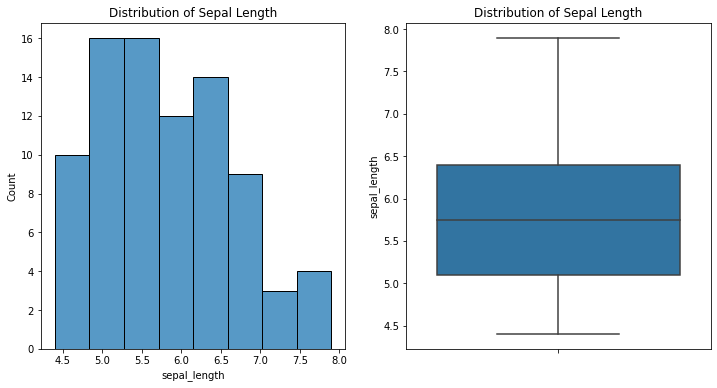

In [62]:
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(data = train.sepal_length, ax = ax[0])
ax[0].set_title('Distribution of Sepal Length')

sns.boxplot(data = train, y = 'sepal_length', ax = ax[1])
ax[1].set_title('Distribution of Sepal Length');

There is a normal(ish) distribution for sepal length. Most observations of sepal length are between 5.0 an 6.0.

---

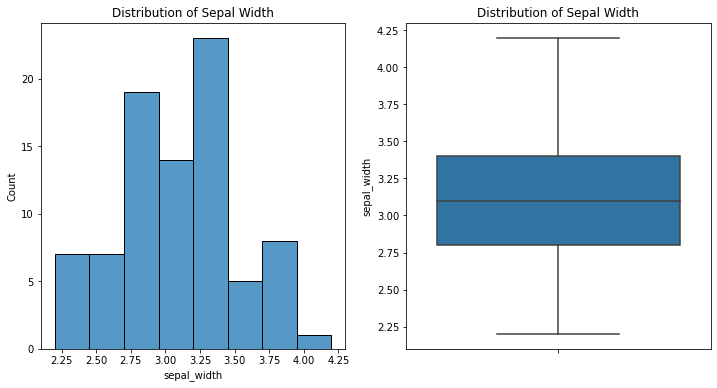

In [63]:
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(data = train.sepal_width, ax = ax[0])
ax[0].set_title('Distribution of Sepal Width')

sns.boxplot(data = train, y = 'sepal_width', ax = ax[1])
ax[1].set_title('Distribution of Sepal Width');

There is a normal(ish) distribution for sepal width. Most observations of sepal width are between 2.75 and 3.50.

---

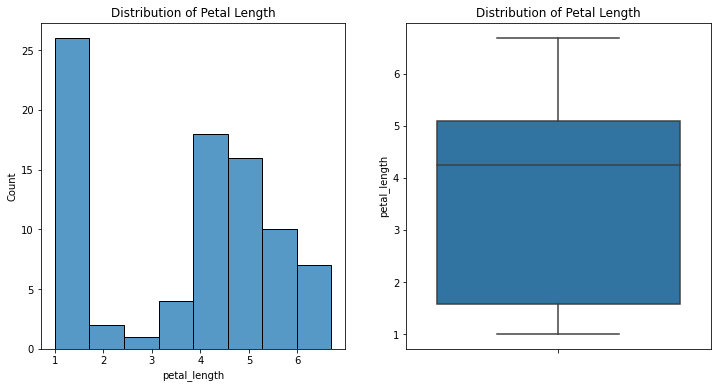

In [64]:
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(data = train.petal_length, ax = ax[0])
ax[0].set_title('Distribution of Petal Length')

sns.boxplot(data = train, y = 'petal_length', ax = ax[1])
ax[1].set_title('Distribution of Petal Length');

There is a clear separation of values for petal length. A large number of observations are less than 2 and another large number of observations are between 4 and 5.

---

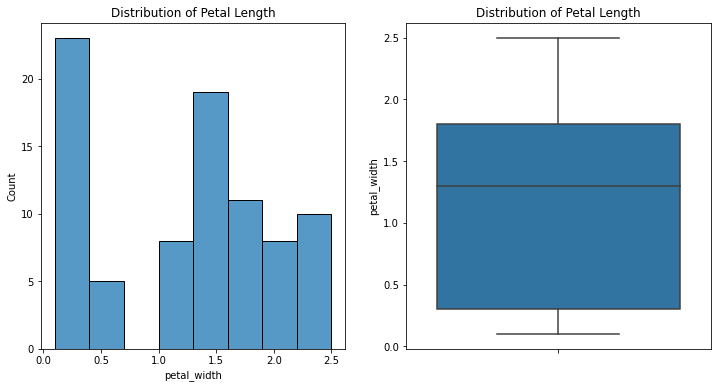

In [65]:
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(data = train.petal_width, ax = ax[0])
ax[0].set_title('Distribution of Petal Length')

sns.boxplot(data = train, y = 'petal_width', ax = ax[1])
ax[1].set_title('Distribution of Petal Length');

There is a clear separation of values for petal length. A large number of observations are less than 0.5 and another large number of observations are approximately 1.5.

---

In [66]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
train[columns].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.816667,3.067857,3.745238,1.197619
std,0.841375,0.435796,1.772304,0.760307
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.100000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.200000,6.700000,2.500000


There appears to be some distinctive separations in the distribution of values for petal length and petal width. These may be good variables to compare to the target variable.

#### Categorical variables

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [67]:
train.species.value_counts()

setosa        28
virginica     28
versicolor    28
Name: species, dtype: int64

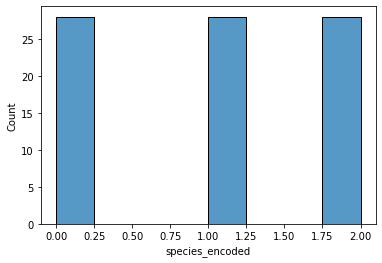

In [68]:
# sns.barplot(data = train, x = 'species');
train_dummy = train
train_dummy['species_encoded'] = train.species.map({
    'setosa' : 0,
    'virginica' : 1,
    'versicolor' : 2
})

sns.histplot(data = train_dummy, x = 'species_encoded');

We have an uniform distribution of species in our dataset.

#### Takeaways

- Document takeaways & any actions.

Petal length and petal width look like good variables to further analyze. We will look more closely at those in comparison to the target variable species.

### 3. Bivariate Stats

#### Compare Measures to Target

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.

##### Sepal Length

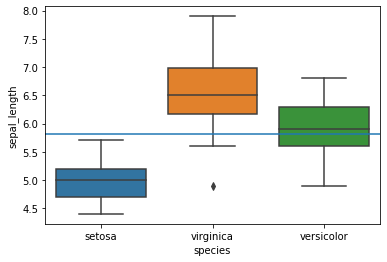

In [69]:
sns.boxplot(data = train, y = 'sepal_length', x = 'species')
sepal_length_mean = train.sepal_length.mean()
plt.axhline(sepal_length_mean, label="Sepal Length Mean");

There is some distinction here between each species but there is significant overlap between virginica and versicolor.

$H_0$: The population means of sepal length for all three species (setosa, virginica, and versicolor) are equal.
<br>
$H_a$: The population means of sepal length for all three species (setosa, virginica, and versicolor) are not equal.

In [70]:
setosa_sepal_length = train[train.species == 'setosa'].sepal_length
virginica_sepal_length = train[train.species == 'virginica'].sepal_length
versicolor_sepal_length = train[train.species == 'versicolor'].sepal_length

stats_util.anova_test(setosa_sepal_length, virginica_sepal_length, versicolor_sepal_length)

Samples contain more than 30 observations: False
Using non-parametric test...

Reject H0


In [79]:
(setosa_sepal_length.describe(),
 '----------',
 virginica_sepal_length.describe(), 
 '----------',
 versicolor_sepal_length.describe())

(count    28.000000
 mean      4.975000
 std       0.340615
 min       4.400000
 25%       4.700000
 50%       5.000000
 75%       5.200000
 max       5.700000
 Name: sepal_length, dtype: float64,
 '----------',
 count    28.000000
 mean      6.571429
 std       0.708079
 min       4.900000
 25%       6.175000
 50%       6.500000
 75%       6.975000
 max       7.900000
 Name: sepal_length, dtype: float64,
 '----------',
 count    28.000000
 mean      5.903571
 std       0.474913
 min       4.900000
 25%       5.600000
 50%       5.900000
 75%       6.300000
 max       6.800000
 Name: sepal_length, dtype: float64)

**Takeaways**

We reject the null hypothesis that the mean of sepal length for all three species are equal so there may be something worth looking at. We see the most significant difference in values between the setosa species and the other two. We may need to test mean equivalence for virginica and versicolor to determine if sepal length should be used in our model.

---

##### Sepal Width

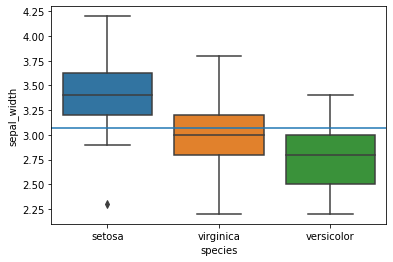

In [71]:
sns.boxplot(data = train, y = 'sepal_width', x = 'species')
sepal_width_mean = train.sepal_width.mean()
plt.axhline(sepal_width_mean, label="Sepal Width Mean");

There is less distinction between each species for sepal width.

$H_0$: The population means of sepal width for all three species (setosa, virginica, and versicolor) are equal.
<br>
$H_a$: The population means of sepal width for all three species (setosa, virginica, and versicolor) are not equal.

In [72]:
setosa_sepal_width = train[train.species == 'setosa'].sepal_width
virginica_sepal_width = train[train.species == 'virginica'].sepal_width
versicolor_sepal_width = train[train.species == 'versicolor'].sepal_width

stats_util.anova_test(setosa_sepal_width, virginica_sepal_width, versicolor_sepal_width)

Samples contain more than 30 observations: False
Using non-parametric test...

Reject H0


In [80]:
(setosa_sepal_width.describe(),
 '----------',
 virginica_sepal_width.describe(), 
 '----------',
 versicolor_sepal_width.describe())

(count    28.000000
 mean      3.414286
 std       0.365872
 min       2.300000
 25%       3.200000
 50%       3.400000
 75%       3.625000
 max       4.200000
 Name: sepal_width, dtype: float64,
 '----------',
 count    28.000000
 mean      3.017857
 std       0.355958
 min       2.200000
 25%       2.800000
 50%       3.000000
 75%       3.200000
 max       3.800000
 Name: sepal_width, dtype: float64,
 '----------',
 count    28.000000
 mean      2.771429
 std       0.324159
 min       2.200000
 25%       2.500000
 50%       2.800000
 75%       3.000000
 max       3.400000
 Name: sepal_width, dtype: float64)

We reject the null hypothesis that the mean of sepal width for all three species are equal so there may be something worth looking at. There is not much distinction between each species for sepal width so we may need to test mean equality for virginica and versicolor to determine if sepal width is worth using in our model.

---

##### Petal Length

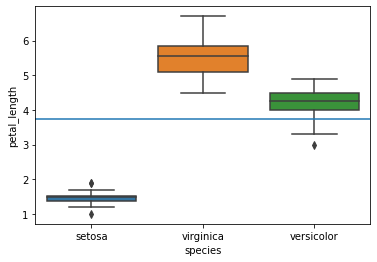

In [73]:
sns.boxplot(data = train, y = 'petal_length', x = 'species')
petal_length_mean = train.petal_length.mean()
plt.axhline(petal_length_mean, label="Petal Length Mean");

There is a significant distinction between each species for the values of petal length. Particularly between setosa and the other two species.

$H_0$: The population means of petal length for all three species (setosa, virginica, and versicolor) are equal.
<br>
$H_a$: The population means of petal length for all three species (setosa, virginica, and versicolor) are not equal.

In [74]:
setosa_petal_length = train[train.species == 'setosa'].petal_length
virginica_petal_length = train[train.species == 'virginica'].petal_length
versicolor_petal_length = train[train.species == 'versicolor'].petal_length

stats_util.anova_test(setosa_petal_length, virginica_petal_length, versicolor_petal_length)

Samples contain more than 30 observations: False
Using non-parametric test...

Reject H0


In [81]:
(setosa_petal_length.describe(),
 '----------',
 virginica_petal_length.describe(), 
 '----------',
 versicolor_petal_length.describe())

(count    28.000000
 mean      1.464286
 std       0.188982
 min       1.000000
 25%       1.375000
 50%       1.500000
 75%       1.525000
 max       1.900000
 Name: petal_length, dtype: float64,
 '----------',
 count    28.000000
 mean      5.560714
 std       0.602673
 min       4.500000
 25%       5.100000
 50%       5.550000
 75%       5.850000
 max       6.700000
 Name: petal_length, dtype: float64,
 '----------',
 count    28.000000
 mean      4.210714
 std       0.467728
 min       3.000000
 25%       4.000000
 50%       4.250000
 75%       4.500000
 max       4.900000
 Name: petal_length, dtype: float64)

We reject the null hypothesis that the population means for petal length for all three species are equal. There is a significant difference in values for each species so petal length is a good feature to use in our model.

---

##### Petal Width

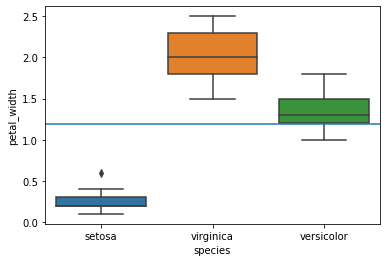

In [82]:
sns.boxplot(data = train, y = 'petal_width', x = 'species')
petal_width_mean = train.petal_width.mean()
plt.axhline(petal_width_mean, label="Petal Width Mean");

There is a significant difference in values for petal width, particularly between setosa and the other two species.

$H_0$: The population means of petal width for all three species (setosa, virginica, and versicolor) are equal.
<br>
$H_a$: The population means of petal width for all three species (setosa, virginica, and versicolor) are not equal.

In [83]:
setosa_petal_width = train[train.species == 'setosa'].petal_width
virginica_petal_width = train[train.species == 'virginica'].petal_width
versicolor_petal_width = train[train.species == 'versicolor'].petal_width

stats_util.anova_test(setosa_petal_width, virginica_petal_width, versicolor_petal_width)

Samples contain more than 30 observations: False
Using non-parametric test...

Reject H0


In [84]:
(setosa_petal_width.describe(),
 '----------',
 virginica_petal_width.describe(), 
 '----------',
 versicolor_petal_width.describe())

(count    28.000000
 mean      0.253571
 std       0.107090
 min       0.100000
 25%       0.200000
 50%       0.200000
 75%       0.300000
 max       0.600000
 Name: petal_width, dtype: float64,
 '----------',
 count    28.000000
 mean      2.017857
 std       0.290662
 min       1.500000
 25%       1.800000
 50%       2.000000
 75%       2.300000
 max       2.500000
 Name: petal_width, dtype: float64,
 '----------',
 count    28.000000
 mean      1.321429
 std       0.207912
 min       1.000000
 25%       1.200000
 50%       1.300000
 75%       1.500000
 max       1.800000
 Name: petal_width, dtype: float64)

We reject the null hypothesis that the population means of petal width for all three species are equal. There is a significant difference in values for petal width, so petal width is a good feature to use in our model.

#### Comparing Virginica and Versicolor

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

#### Takeaways

- Document takeaways & any actions.